In [565]:
import pdfplumber
import pandas as pd
from konlpy.tag import Okt
from ckonlpy.tag import Twitter
from pykospacing import Spacing
#from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### pdf 불러오기

In [566]:
for i in range(1, 15):
    globals()[f'path_{i}'] = f'open/기호_{i} 공약.pdf'

In [567]:
no_list = []
for i in range(1, 15):
    no_list.append(globals()[f'path_{i}'])

### pdf 전처리 함수 설정

In [568]:
def pre_pro_pdf(temp):
    for i in range(len(temp.pages)):
        globals()[f'a_{i}_{i}'] = globals()[f'a_{i}'].rfind('\n') + 1
        globals()[f'a_{i}'] = globals()[f'a_{i}'][:globals()[f'a_{i}_{i}']]
    globals()[f'a_0'] = globals()[f'a_0'][globals()[f'a_0'].find('\n',3)+1:]
    for i in range(1, len(temp.pages)):
        globals()[f'a_0'] += globals()[f'a_{i}']
    return a_0

In [569]:
for i,j in zip(no_list, range(1, 15)):
    with pdfplumber.open(i) as temp:
        for k in range(len(temp.pages)):
            globals()[f'{k}_page'] = temp.pages[k]
            globals()[f'a_{k}'] = globals()[f'{k}_page'].extract_text()
    globals()[f'no_{j}'] = pre_pro_pdf(temp) # no_1 ~ no_14 까지 각 후보들의 공약임

In [570]:
for i in range(1, 15):
    globals()[f'no_{i}'] = globals()[f'no_{i}'].split('공약순위')

In [571]:
for i in range(1, 15):
    del globals()[f'no_{i}'][0]

### 각 후보별 공약을 DataFrame 으로

In [572]:
df = pd.DataFrame()

In [573]:
for i in range(1, 15):
    df[f'{i}번후보'] = globals()[f'no_{i}']

### 12, 14번 후보의 공약은 목표, 이행방법 등의 구분이 없음
### 다른 후보들의 공약은 목표 / 이행방법 / 이행기간 / 재원조달방안이 있으나
### 이행기간 / 재원조달방안 등은 분석에 불필요해 보이므로 제거하고
### 목표와 이행방법에 중복되는 부분이 많으므로 이행방법만 남기고 제거
### '이행방법'이 '이행 방법' / '목표'가 '목 표'/  '이행기간'이 '이행 기간'으로 표시된 부분 있음.

In [574]:
def del_space(df):
    list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13]
    for i in list:
        for j in range(len(df)):
            df[f'{i}번후보'][j] = df[f'{i}번후보'][j].replace('이행 방법', '이행방법')
            df[f'{i}번후보'][j] = df[f'{i}번후보'][j].replace('이행 기간', '이행기간')
            df[f'{i}번후보'][j] = df[f'{i}번후보'][j].replace('목 표', '목표')
    return df

In [575]:
def change_contents(df):
    list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13]
    for i in list:
        for j in range(len(df)):
            df[f'{i}번후보'][j] = df[f'{i}번후보'][j][:df[f'{i}번후보'][j].find('목표')] + df[f'{i}번후보'][j][df[f'{i}번후보'][j].find('이행방법'):df[f'{i}번후보'][j].find('이행기간')]
    return df

In [576]:
del_space(df)
change_contents(df)

,1번후보,2번후보,3번후보,4번후보,5번후보,6번후보,7번후보,8번후보,9번후보,10번후보,11번후보,12번후보,13번후보,14번후보
0,1 : 코로나 팬데믹 완전극복과 피해소상공인에 대한 완전한 지원\n이행방법\n코로...,1 : 코로나 극복 긴급구조 및 포스트 코로나 플랜\n이행방법\n긴급구조 프로그램...,1 : 기후위기 극복을 위한 정의로운 탈탄소사회로의 전환\n이행방법\n탈탄소사회로...,1 : 5•5•5 신성장전략으로 미래먹거리와 청년일자리 창출하겠습니다\n이행방법\...,1 : 당신이 누구든 매달 65만 원 기본소득\n이행방법\n전국민 기본소득 시행\...,1 : 코로나 긴급생계지원금 1억 지급 및 국민배당금 매월 150만원 평생 지금\...,1 : 재벌국유화•국가투자은행설립으로 공공경제 실현\n이행방법\n국가투자은행 설립...,1 : 4•15 부정선거 진실 규명\n이행방법\n지연된 재판 속개와 증거를 만천하...,1 : 권력구조 개편 및 정치 개혁\n이행방법\n제왕적 대통령제를 분권형 대통령제...,1 : 한•미•일 군사동맹강화와 한•일 핵무기 공동개발\n이행방법\n한•미•일 연...,1 붉은적폐 청산 및 악법 폐지\n이행방법\n붉은적폐 청산\n좌파독재정권은 권력분...,"1 : 땅보다 땀, 일하는 사람들이 행복한 나라\n헌법 제1조에 ‘대한민국은 노동...",1 : 국민의 삶이 행복한 부동산시장 안정\n이행방법\n모든 국민을 부자로 만들어...,1 : 한반도 프로젝트\n한반도 프로젝트\n[한반도 프로젝트] 정의\n한반도 비무...
1,"2 : 수출 1조 달러, 국민소득 5만 달러 달성, 주가지수 5000으로 세계5강...",2 : 지속가능한 좋은 일자리 창출\n이행방법\n정부의 정책목표를 좋은 일자리 창...,"2 : 노동자, 자영업자, 농어민의 일할 권리와 기본권 보장\n이행방법\n‘일하는...",2 : 자주•실용•평화 책임외교전략으로 한반도 평화통일 추진하겠습니다\n이행방법\...,2 : 토지세 기본소득 패키지로 부동산 불평등 해소\n이행방법\n기본소득 토지세 ...,"2 : 결혼하는 부부에게 3억원 지급, 출산수당 5천만원, 육아수당 매월 100만...","2 : 1,000만 국가책임일자리로 완전 고용\n이행방법\n",2 : 공직선거 및 정당 내 전자투표금지\n이행방법\n각 기관의 내부규칙 및 시행...,2 : 공공부문•관료 개혁\n이행방법\n공직을 관리직과 전문직으로 나누고 관리직은...,2 : 공영방송 폐지와 빅테크 언론검열 금지\n이행방법\nKBS가 사용중인 3개 ...,2 : 소득주도성장정책 폐기 및 성장중심경제정책 추진\n이행방법\n소득주도성장정책...,2 : 모두를 위한 성평등한 나라\n모든 형태의 혐오와 차별 금지하는 ‘차별금지법...,2 : 민생경제에 활력을 주는 감세\n이행방법\n법인세를 인하하여 기업의 경쟁력을...,2 : 정권교체가 아니라 정치교체\n새로운 시대를 맞이하는 정치! \n새로운 나라...
2,"3 : 경제적 기본권 보장, 여성안심 평등사회, ‘청년기회국가' 건설\n이행방법\...",3 : 수요에 부응하는 주택 250만호 이상 공급\n이행방법\n주택공급 로드맵 작...,"3 : 성차별, 폭력없는 성평등 사회 실현 청년, 청소년의 다양성 존중과 미래사회...","3 : 공적연금 통합하여 청년의 미래, 대한민국의 미래를 지키겠습니다\n이행방법\...",3 : 누구나 나답게 사는 성평등 사회\n이행방법\n성범죄·여성폭력 근절\n디지털...,"3 : 국회의원 100명으로 축소, 무보수 명예직으로 전환(지자체 의원 포함), ...",3 : 전 기업 탄소배출 감축의 무제로 기후정의 실현\n이행방법\n기업 탄소배출 ...,3 : 선관위 법관 임명 금지\n이행방법\n명망있는 시민의 참여를 통해 위원을 임...,3 : 국가균형발전\n이행방법\n5개의 서울수준의 메가시티를 구축\n수도권(강원)...,"3 : 법원 내 사조직 폐지, 사전선거 폐지, 수개표 실시\n이행방법\n법원 내 ...",3 : 국가건전재정법 제정과 포퓰리즘정책의 억제\n이행방법\n문재인 좌파독재정권은...,3 : 농민기본법 제정으로 농업대혁명 자영업자 생계 전면보장 노점상도 경제적 주\...,3 : 자유경제와 혁신성정을 통한 세계 5대 경제강국\n이행방법\n창의와 원천기술...,"3 : 대통령은 외치, 내각은 내치\n국가를 효율적으로 운영하고, 미래 준비를 위..."
3,"4 : 311만호 주택공급으로 내집마련•주거안정 실현, 함께 잘 사는 균형발전\n...",4 : 스마트하고 공정하게 봉사하는 ‘디지털 플랫폼 정부’ 구현과 대통령실 개혁\...,4 : 부동산 불평등 해소•투기 근절 기후위기•차별 해소를 위한 조세 개혁\n이행...,4 : 코로나19 자영업 영업시간 제한 폐지하고 150조 손실보상하겠습니다.\n이...,4 : 민주주의 기본소득으로 시작하는 정치개혁\n이행방법\n평등한 정치참여의 전제...,"4 : 징병제를 폐지 모병제로 전환하고, 기존 사병월급 매월 200만 원으로 상향...",4 : 읍면동 공공가사돌봄센터로 국가 책임 돌봄사회\n이행방법\n공공사회서비스기본...,4 : 투표절차의 공정성 확보\n이행방법\n행정명령과 법제정을 통해 투표함 이동과...,4 : 소상공인•자영업자 및 중소기업 대책\n이행방법\n즉각적인 소상공인·자영업자...,4 : 대규모 재개발을 통한 풍부한 민간주택공급\n이행방법\n서울의 강북 등 낙후...,4 : 방역체계 개혁\n이행방법\n문재인 좌파독재정권은 중국에서 코로나가 발생한 ...,"4 : 일하는 청소년, 집 없는 청년, 모두를 위한 평등사회\n알바도 실업급여, ...","4 : 갈등해소를 통한 국민화합과 통합\n이행방법\n국민분열, 보복정치를 종식시키...","4 : 정치 논리에서 벗어난 장관 인선, 책임을 지는 행정\n내각의 장관들은 정치..."
4,"5 : 어르신, 환자, 장애인, 아동, 영•유아 돌봄 국가책임제, 국민안심국가 실...",5 : 과학기술 추격국가에서 원천기술 선도국가로\n이행방법\n정부의 과학기술 리더...,"5 : 불공정 해소, 미래를 대비하는 경제개혁\n이행방법\n「디지털플랫폼기업 독점...",5 : 반값 토지임대부 ‘안심주택’으로 내집마련 시대 열겠습니다\n이행방법\n5년...,5 : 기본소득 그린뉴딜로 2050 탄소 중립 달성\n이행방법\n기본소득 탄소세 ...,"5 : 중, 고증 전공 1과목만 시험 그 총점으로 대학 진학\n이행방법\n수능시험...","5 : 민간임대 금지•공공주택 1,000만 호로 공공주거 실현\n이행방법\n민간임...",5 : 전자선거인명부 사용 금지\n이행방법\n전자선거인명부의 사용금지 행정규칙과 ...,5 : 보편적 소득안전망•저출산고령화 대책\n이행방법\n보편주의 원칙의 사회보장제...,5 : 대학의 완전 자유화 보장과 사학재단 자율 정리\n이행방법\n정부가 대학의 ...,5 : 혁신적 국토균형발전정책 추진\n이행방법\n수도권 인구집중으로 수도권은 인구...,5 : 부동산 투기공화국 해체하고 제2의 토지개혁 실현\n토지공개념 3법(택지소유...,"5 : 청년 성공의 기반을 제공하는 청년 행복\n이행방법\n무상 등록금, 주거 지...",5 : 국가진단위원회 구성\n오늘을 토대로 과거를 진단하여 미래를 준비합니다.\n...
5,6 : 일하는 사람들의 권리보장과 일자리 대전환으로 성장하는 사회 실현\n이행방법...,6 : 출산 준비부터 산후조리•양육까지 국가책임 강화\n이행방법\n임신ᆞ출산 전 ...,6 : 국민건강권 및 전국민 돌봄 보장\n이행방법\n공공의료 확대 및 지역별 필수...,6 : 부모찬스 수시 폐지하고 학제개편으로 창의적 미래교육 하겠습니다\n이행방법\...,6 : 공공사회서비스 강화로 모두의 기본권이 보장되는 나라\n이행방법\n누구나 디...,"6 : 청년취업 국가책임제 실시, 중소기업 취업자에게 월 100만원 지급, 중소기...",6 : 의료•교육•교통•통신•에너지 공영화로 공공복지 실현\n이행방법\n의료공영화...,"6 : 사전투표 폐지, 우편투표 최소화\n이행방법\n본투표 당일날의 투표를 대대적...",6 : G10 대한민국 만들기\n이행방법\n글로벌 디지털 경제영토 확장\n디지털 ...,"6 : 연금개혁\

### 공약순위 숫자 제거 및 '\n' 을 ' '로 replace

In [577]:
def del_first_num(df):
    list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
    for i in list:
        for j in range(len(df)):
            df[f'{i}번후보'][j] = df[f'{i}번후보'][j][3:]
            df[f'{i}번후보'][j] = df[f'{i}번후보'][j].strip(':')
            df[f'{i}번후보'][j] = df[f'{i}번후보'][j].replace('\n', ' ')
    return df

In [578]:
del_first_num(df)

,1번후보,2번후보,3번후보,4번후보,5번후보,6번후보,7번후보,8번후보,9번후보,10번후보,11번후보,12번후보,13번후보,14번후보
0,코로나 팬데믹 완전극복과 피해소상공인에 대한 완전한 지원 이행방법 코로나 팬데믹 ...,코로나 극복 긴급구조 및 포스트 코로나 플랜 이행방법 긴급구조 프로그램 가동을 위...,기후위기 극복을 위한 정의로운 탈탄소사회로의 전환 이행방법 탈탄소사회로의 전환 ‘...,5•5•5 신성장전략으로 미래먹거리와 청년일자리 창출하겠습니다 이행방법 5-5-5...,당신이 누구든 매달 65만 원 기본소득 이행방법 전국민 기본소득 시행 월 65만 ...,코로나 긴급생계지원금 1억 지급 및 국민배당금 매월 150만원 평생 지금 이행방법...,재벌국유화•국가투자은행설립으로 공공경제 실현 이행방법 국가투자은행 설립 기후정의실...,4•15 부정선거 진실 규명 이행방법 지연된 재판 속개와 증거를 만천하에 공개하여...,권력구조 개편 및 정치 개혁 이행방법 제왕적 대통령제를 분권형 대통령제로 개헌 책...,한•미•일 군사동맹강화와 한•일 핵무기 공동개발 이행방법 한•미•일 연합훈련 강화...,붉은적폐 청산 및 악법 폐지 이행방법 붉은적폐 청산 좌파독재정권은 권력분립과 적법절...,"땅보다 땀, 일하는 사람들이 행복한 나라 헌법 제1조에 ‘대한민국은 노동중심 자주...",국민의 삶이 행복한 부동산시장 안정 이행방법 모든 국민을 부자로 만들어 드리겠습니...,한반도 프로젝트 한반도 프로젝트 [한반도 프로젝트] 정의 한반도 비무장지대((DM...
1,"수출 1조 달러, 국민소득 5만 달러 달성, 주가지수 5000으로 세계5강 달성 ...","지속가능한 좋은 일자리 창출 이행방법 정부의 정책목표를 좋은 일자리 창출에 두고,...","노동자, 자영업자, 농어민의 일할 권리와 기본권 보장 이행방법 ‘일하는 시민’ 모...",자주•실용•평화 책임외교전략으로 한반도 평화통일 추진하겠습니다 이행방법 북한 핵 ...,토지세 기본소득 패키지로 부동산 불평등 해소 이행방법 기본소득 토지세 도입 현행 ...,"결혼하는 부부에게 3억원 지급, 출산수당 5천만원, 육아수당 매월 100만원 지 ...","1,000만 국가책임일자리로 완전 고용 이행방법",공직선거 및 정당 내 전자투표금지 이행방법 각 기관의 내부규칙 및 시행령등을 전부...,공공부문•관료 개혁 이행방법 공직을 관리직과 전문직으로 나누고 관리직은 정년 폐지...,"공영방송 폐지와 빅테크 언론검열 금지 이행방법 KBS가 사용중인 3개 채널(제1,...",소득주도성장정책 폐기 및 성장중심경제정책 추진 이행방법 소득주도성장정책의 폐기 좌...,모두를 위한 성평등한 나라 모든 형태의 혐오와 차별 금지하는 ‘차별금지법’ 제정 ...,민생경제에 활력을 주는 감세 이행방법 법인세를 인하하여 기업의 경쟁력을 강화하겠습...,정권교체가 아니라 정치교체 새로운 시대를 맞이하는 정치! 새로운 나라를 준비하는...
2,"경제적 기본권 보장, 여성안심 평등사회, ‘청년기회국가' 건설 이행방법 전 국민 ...",수요에 부응하는 주택 250만호 이상 공급 이행방법 주택공급 로드맵 작성(2022...,"성차별, 폭력없는 성평등 사회 실현 청년, 청소년의 다양성 존중과 미래사회 보 장...","공적연금 통합하여 청년의 미래, 대한민국의 미래를 지키겠습니다 이행방법 일반국민과...",누구나 나답게 사는 성평등 사회 이행방법 성범죄·여성폭력 근절 디지털 성범죄 양형...,"국회의원 100명으로 축소, 무보수 명예직으로 전환(지자체 의원 포함), 지방 자...",전 기업 탄소배출 감축의 무제로 기후정의 실현 이행방법 기업 탄소배출 감축의무 전...,선관위 법관 임명 금지 이행방법 명망있는 시민의 참여를 통해 위원을 임명할 수 있...,국가균형발전 이행방법 5개의 서울수준의 메가시티를 구축 수도권(강원)·부울경·대구...,"법원 내 사조직 폐지, 사전선거 폐지, 수개표 실시 이행방법 법원 내 우리법 연구...",국가건전재정법 제정과 포퓰리즘정책의 억제 이행방법 문재인 좌파독재정권은 집권세력의...,농민기본법 제정으로 농업대혁명 자영업자 생계 전면보장 노점상도 경제적 주 체 인정...,자유경제와 혁신성정을 통한 세계 5대 경제강국 이행방법 창의와 원천기술을 갖춘 1...,"대통령은 외치, 내각은 내치 국가를 효율적으로 운영하고, 미래 준비를 위해서 국정..."
3,"311만호 주택공급으로 내집마련•주거안정 실현, 함께 잘 사는 균형발전 이행방법 ...",스마트하고 공정하게 봉사하는 ‘디지털 플랫폼 정부’ 구현과 대통령실 개혁 이행방법...,부동산 불평등 해소•투기 근절 기후위기•차별 해소를 위한 조세 개혁 이행방법 제2...,코로나19 자영업 영업시간 제한 폐지하고 150조 손실보상하겠습니다. 이행방법 과...,"민주주의 기본소득으로 시작하는 정치개혁 이행방법 평등한 정치참여의 전제조건, 민주...","징병제를 폐지 모병제로 전환하고, 기존 사병월급 매월 200만 원으로 상향 지 급...",읍면동 공공가사돌봄센터로 국가 책임 돌봄사회 이행방법 공공사회서비스기본법제정 돌봄...,투표절차의 공정성 확보 이행방법 행정명령과 법제정을 통해 투표함 이동과 보관을 원...,소상공인•자영업자 및 중소기업 대책 이행방법 즉각적인 소상공인·자영업자 손실보상 ...,대규모 재개발을 통한 풍부한 민간주택공급 이행방법 서울의 강북 등 낙후지역 용적율...,방역체계 개혁 이행방법 문재인 좌파독재정권은 중국에서 코로나가 발생한 초기에 중국...,"일하는 청소년, 집 없는 청년, 모두를 위한 평등사회 알바도 실업급여, 취업준비생...","갈등해소를 통한 국민화합과 통합 이행방법 국민분열, 보복정치를 종식시키겠습니다. ...","정치 논리에서 벗어난 장관 인선, 책임을 지는 행정 내각의 장관들은 정치의 논리에..."
4,"어르신, 환자, 장애인, 아동, 영•유아 돌봄 국가책임제, 국민안심국가 실현 이행...","과학기술 추격국가에서 원천기술 선도국가로 이행방법 정부의 과학기술 리더십 강화, ...","불공정 해소, 미래를 대비하는 경제개혁 이행방법 「디지털플랫폼기업 독점방지법」 제...",반값 토지임대부 ‘안심주택’으로 내집마련 시대 열겠습니다 이행방법 5년간 전국에 ...,기본소득 그린뉴딜로 2050 탄소 중립 달성 이행방법 기본소득 탄소세 도입 화석 ...,"중, 고증 전공 1과목만 시험 그 총점으로 대학 진학 이행방법 수능시험 폐지 중등...","민간임대 금지•공공주택 1,000만 호로 공공주거 실현 이행방법 민간임대 금지와 ...",전자선거인명부 사용 금지 이행방법 전자선거인명부의 사용금지 행정규칙과 대통령령에 ...,보편적 소득안전망•저출산고령화 대책 이행방법 보편주의 원칙의 사회보장제도 확립 동...,"대학의 완전 자유화 보장과 사학재단 자율 정리 이행방법 정부가 대학의 신입생선발,...",혁신적 국토균형발전정책 추진 이행방법 수도권 인구집중으로 수도권은 인구가 너무 많...,"부동산 투기공화국 해체하고 제2의 토지개혁 실현 토지공개념 3법(택지소유상한제, ...","청년 성공의 기반을 제공하는 청년 행복 이행방법 무상 등록금, 주거 지원, 일자리...",국가진단위원회 구성 오늘을 토대로 과거를 진단하여 미래를 준비합니다. 대한민국 정...
5,일하는 사람들의 권리보장과 일자리 대전환으로 성장하는 사회 실현 이행방법 (가칭)...,출산 준비부터 산후조리•양육까지 국가책임 강화 이행방법 임신ᆞ출산 전 성인여성 건...,국민건강권 및 전국민 돌봄 보장 이행방법 공공의료 확대 및 지역별 필수중증의료 보...,부모찬스 수시 폐지하고 학제개편으로 창의적 미래교육 하겠습니다 이행방법 부모찬스 ...,"공공사회서비스 강화로 모두의 기본권이 보장되는 나라 이행방법 누구나 디지털, 디지...","청년취업 국가책임제 실시, 중소기업 취업자에게 월 100만원 지급, 중소기업 5 ...",의료•교육•교통•통신•에너지 공영화로 공공복지 실현 이행방법 의료공영화 OECD ...,"사전투표 폐지, 우편투표 최소화 이행방법 본투표 당일날의 투표를 대대적으로 홍보하...",G10 대한민국 만들기 이행방법 글로벌 디지털 경제영토 확장 디지털 청년 인재 1...,"연금

In [579]:
list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for i in list:
    df[f'{i}번후보'][9] = df[f'{i}번후보'][9].strip(' :')

In [580]:
list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for i in list:
    for j in range(len(df)):
        df[f'{i}번후보'][j] = df[f'{i}번후보'][j].replace('이행방법', ' ')

### pdf 불러오는 과정에서 줄바뀜으로 인한 띄어쓰기 오류 존재
### 모든 띄어쓰기를 제거한 후 spacing을 이용해 다시 띄어쓰기

In [581]:
list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for i in list:
    for j in range(len(df)):
        df[f'{i}번후보'][j] = df[f'{i}번후보'][j].replace(' ', '')

In [582]:
df

,1번후보,2번후보,3번후보,4번후보,5번후보,6번후보,7번후보,8번후보,9번후보,10번후보,11번후보,12번후보,13번후보,14번후보
0,코로나팬데믹완전극복과피해소상공인에대한완전한지원코로나팬데믹완전극복을위한대응강화오미크론...,코로나극복긴급구조및포스트코로나플랜긴급구조프로그램가동을위한법률제정및개정(인수위에서일괄...,"기후위기극복을위한정의로운탈탄소사회로의전환탈탄소사회로의전환‘기후에너지부’를신설,대통령...",5•5•5신성장전략으로미래먹거리와청년일자리창출하겠습니다5-5-5신성장전략추진5대초격...,당신이누구든매달65만원기본소득전국민기본소득시행월65만원의기본소득지급지식공유부에대한목...,코로나긴급생계지원금1억지급및국민배당금매월150만원평생지금코로나긴급생계지원금지급18세...,"재벌국유화•국가투자은행설립으로공공경제실현국가투자은행설립기후정의실현을위한투자,사회적필...",4•15부정선거진실규명지연된재판속개와증거를만천하에공개하여제대로된법치국가가되게하겠습니다.,권력구조개편및정치개혁제왕적대통령제를분권형대통령제로개헌책임총리제와책임장관제실시헌법개정...,한•미•일군사동맹강화와한•일핵무기공동개발한•미•일연합훈련강화일본요코스카항에주둔중인미...,"붉은적폐청산및악법폐지붉은적폐청산좌파독재정권은권력분립과적법절차등의헌법원리를위반하여,국...","땅보다땀,일하는사람들이행복한나라헌법제1조에‘대한민국은노동중심자주평등국가’명시하는‘노...",국민의삶이행복한부동산시장안정모든국민을부자로만들어드리겠습니다.부지런하게저축하고안정적인...,한반도프로젝트한반도프로젝트[한반도프로젝트]정의한반도비무장지대((DMZ)에전세계가함께...
1,"수출1조달러,국민소득5만달러달성,주가지수5000으로세계5강달성전환적공정성장과산업혁신...","지속가능한좋은일자리창출정부의정책목표를좋은일자리창출에두고,산업정책,교육정책,노동정책,...","노동자,자영업자,농어민의일할권리와기본권보장‘일하는시민’모두에게노동기본권보장<일하는시...",자주•실용•평화책임외교전략으로한반도평화통일추진하겠습니다북한핵위협에대항하는‘한미핵공유...,"토지세기본소득패키지로부동산불평등해소기본소득토지세도입현행종합부동산세폐지,모든민간보유토...","결혼하는부부에게3억원지급,출산수당5천만원,육아수당매월100만원지급,연애수당매월20만...","1,000만국가책임일자리로완전고용",공직선거및정당내전자투표금지각기관의내부규칙및시행령등을전부수정.선관위를비롯하여행정제반기...,공공부문•관료개혁공직을관리직과전문직으로나누고관리직은정년폐지일반행정공무원수과감히감축(...,"공영방송폐지와빅테크언론검열금지KBS가사용중인3개채널(제1,제2,교육방송)의주파수를국...",소득주도성장정책폐기및성장중심경제정책추진소득주도성장정책의폐기좌파독재정권은경제논리에어긋...,모두를위한성평등한나라모든형태의혐오와차별금지하는‘차별금지법’제정정치적.경제적.사회적....,민생경제에활력을주는감세법인세를인하하여기업의경쟁력을강화하겠습니다.법인세부담경감을통해기...,정권교체가아니라정치교체새로운시대를맞이하는정치!새로운나라를준비하는정치!단순한정권교체가...
2,"경제적기본권보장,여성안심평등사회,‘청년기회국가'건설전국민보편기본소득추진대통령직속기본...",수요에부응하는주택250만호이상공급주택공급로드맵작성(2022년):새정부출범직후주택공급...,"성차별,폭력없는성평등사회실현청년,청소년의다양성존중과미래사회보장젠더폭력없는안전사회실현...","공적연금통합하여청년의미래,대한민국의미래를지키겠습니다일반국민과공무원도평등한동일연금제(...","누구나나답게사는성평등사회성범죄·여성폭력근절디지털성범죄양형기준개정,불법촬영물선제적삭제...","국회의원100명으로축소,무보수명예직으로전환(지자체의원포함),지방자치단체장선거제도폐지...",전기업탄소배출감축의무제로기후정의실현기업탄소배출감축의무전면확대현행197개로제한된기업탄...,선관위법관임명금지명망있는시민의참여를통해위원을임명할수있습니다.여야동수국회의원이나각기관...,국가균형발전5개의서울수준의메가시티를구축수도권(강원)·부울경·대구경북·대전충청·광주호...,"법원내사조직폐지,사전선거폐지,수개표실시법원내우리법연구회와국제인권법연구회등사조직을철폐...",국가건전재정법제정과포퓰리즘정책의억제문재인좌파독재정권은집권세력의정치적목적을달성하기위하...,"농민기본법제정으로농업대혁명자영업자생계전면보장노점상도경제적주체인정농민기본법제정,식량자...","자유경제와혁신성정을통한세계5대경제강국창의와원천기술을갖춘1,000개글로벌기업을육성하겠...","대통령은외치,내각은내치국가를효율적으로운영하고,미래준비를위해서국정운영시스템을변화해야합..."
3,"311만호주택공급으로내집마련•주거안정실현,함께잘사는균형발전청년과무주택자,실수요자의내...",스마트하고공정하게봉사하는‘디지털플랫폼정부’구현과대통령실개혁디지털플랫폼거버넌스구축청사...,부동산불평등해소•투기근절기후위기•차별해소를위한조세개혁제2의토지개혁-부동산불평등해소·...,코로나19자영업영업시간제한폐지하고150조손실보상하겠습니다.과학적방역체계와병상·의료인...,"민주주의기본소득으로시작하는정치개혁평등한정치참여의전제조건,민주주의기본소득시행모든18세...","징병제를폐지모병제로전환하고,기존사병월급매월200만원으로상향지급,월남6.25참전용사및...",읍면동공공가사돌봄센터로국가책임돌봄사회공공사회서비스기본법제정돌봄·보육·가사등사회서비스...,투표절차의공정성확보행정명령과법제정을통해투표함이동과보관을원천봉쇄하겠습니다.-,소상공인•자영업자및중소기업대책즉각적인소상공인·자영업자손실보상지원(2022년)예산(6...,대규모재개발을통한풍부한민간주택공급서울의강북등낙후지역용적율을2000~3000%로상향민...,방역체계개혁문재인좌파독재정권은중국에서코로나가발생한초기에중국인의입국금지와같은기본적인방...,"일하는청소년,집없는청년,모두를위한평등사회알바도실업급여,취업준비생이직준비급여받을수있도...","갈등해소를통한국민화합과통합국민분열,보복정치를종식시키겠습니다.국민기본소득,국민기본주택...","정치논리에서벗어난장관인선,책임을지는행정내각의장관들은정치의논리에서벗어난인선이되어야합니..."
4,"어르신,환자,장애인,아동,영•유아돌봄국가책임제,국민안심국가실현어르신돌봄국가책임강화로...","과학기술추격국가에서원천기술선도국가로정부의과학기술리더십강화,데이터에근거한국정운영과학기...","불공정해소,미래를대비하는경제개혁「디지털플랫폼기업독점방지법」제정플랫폼기업의이해충돌행위...",반값토지임대부‘안심주택’으로내집마련시대열겠습니다5년간전국에주택총250만호공급토지임대...,기본소득그린뉴딜로2050탄소중립달성기본소득탄소세도입화석에너지전체에대해탄소세도입과세수...,"중,고증전공1과목만시험그총점으로대학진학수능시험폐지중등교육6년과정에개인이선택한1과목시...","민간임대금지•공공주택1,000만호로공공주거실현민간임대금지와공공주택1,000만호보장으...",전자선거인명부사용금지전자선거인명부의사용금지행정규칙과대통령령에의한원천적봉쇄및국회의협조...,"보편적소득안전망•저출산고령화대책보편주의원칙의사회보장제도확립동일한피해및수요있을시,차별...","대학의완전자유화보장과사학재단자율정리정부가대학의신입생선발,학과개설,등록금결정등에간섭할...","혁신적국토균형발전정책추진수도권인구집중으로수도권은인구가너무많고,지방은인구가너무적어서심...","부동산투기공화국해체하고제2의토지개혁실현토지공개념3법(택지소유상한제,토지초과이득세,개...","청년성공의기반을제공하는청년행복무상등록금,주거지원,일자리지원으로청년성공3대보장정책을펼...",국가진단위원회구성오늘을토대로과거를진단하여미래를준비합니다.대한민국정부수립이후현재까지의...
5,일하는사람들의권리보장과일자리대전환으로성장하는사회실현(가칭)‘일하는사람들의권리보장기본...,출산준비부터산후조리•양육까지국가책임강화임신ᆞ출산전성인여성건강검진지원확대건강보험법20...,국민건강권및전국민돌봄보장공공의료확대및지역별필수중증의료보장공공병원예비타당성면제70개중...,"부모찬스수시폐지하고학제개편으로창의적미래교육하겠습니다부모찬스수시폐지,정시전면화일반전형...","공공사회서비스강화로모두의기본권이보장되는나라누구나디지털,디지털기본권구축디지털전환시기필...","청년취업국가책임제실시,중소기업취업자에게월100만원지급,중소기업5년이상근무자창업시무이...",의료•교육•교통•통신•에너지공영화로공공복지실현의료공영화OECD평균수준공공의료기관·공...,"사전투표폐지,우편투표최소화본투표당일날의투표

In [583]:
spacing = Spacing()

In [584]:
for i in list:
    for j in range(len(df)):
        df[f'{i}번후보'][j] = spacing(df[f'{i}번후보'][j])

In [585]:
df_1 = pd.DataFrame()
df_1 = df.copy()

### Twitter, Okt 객체생성

In [586]:
twitter = Twitter()
okt = Okt()

D:\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### Twitter에 dictionary 추가

In [587]:
add_list = ['포스트코로나', 'noun', '긴급구조', 'noun', '긴급구조특별본부', 'noun', '가동', 'noun', '감염병', 'noun', '건강보험법', 'noun', '시행령', 'noun', '지속가능', 'noun', '창출', 'noun', '산업정책', 'noun', '교육정책', 'noun', '노동정책', 'noun', '복지정책', 'noun', '경제사회정책', 'noun', '연계', 'noun',  '전담기구', 'noun', '기업투자', 'noun', '친화', 'noun', '연공급', 'noun', '체계','noun', 'R&D', 'noun', '비대면', 'noun', '성장', 'noun', '폐지', 'noun', '저해', 'noun', '불필요', 'noun', '전생애', 'noun', 'well-tech', 'noun', '다원화', 'noun', '시행령','noun', '봉사', 'noun', '재개정', 'noun', '국정운영', 'noun', '도입', 'noun', '과제', 'noun', '제도화', 'noun', '명확화', 'noun', '특성화대학', 'noun', '선도', 'noun', '중장기적', 'noun', '제고', 'noun', '기회의장', 'noun', '공정성', 'noun', '치료비', 'noun', '시술비', 'noun', '자부담', 'noun', '난임', 'noun', '치료', 'noun', '비급여', 'noun', '고용보험', 'noun', '연관성', 'noun', '보건복지부', 'noun', '설립', 'noun', '아웃제', 'noun', '감독제', 'noun', '보호수용제', 'noun', '흉악범', 'noun', '고의', 'noun', '피부양자', 'noun', '출발선', 'noun', '도약', 'noun', '당당', 'noun', '일관성', 'noun', '상호주의', 'noun', '상설', 'noun', '협의체', 'noun', '기동훈련', 'noun', '킬체인', 'noun', 'kill-chain', 'noun', '최강국', 'noun', '최소', 'noun', '투자', 'noun', '전방위', 'noun', '택소노미', 'noun', '안전', 'noun', '전문과정', 'noun', '신설', 'noun', '공정성' ,'noun' ,'획기', 'noun', '유도', 'noun', '신산업', 'noun', '전문대학', 'noun']
for i in range(len(add_list)):
    add_list[i] = add_list[i].replace('noun', 'Noun')
twitter.add_dictionary('꿈', 'Noun')
twitter.add_dictionary('설치', 'Noun')
for i in range(0, 164, 2):
    twitter.add_dictionary(add_list[i], add_list[i+1])

### 불용어 추가

In [588]:
stop_words = '''
위
과
한
•
/
고
,
및
ᆞ
-
(
)
.
을
‘
’
의
를
에
으로
적
·
이
로
등
는
인
와
제
가
은
하는
화
하고
할
에서
수
형
자
1
성
대한
도
하여
'''

In [589]:
stop_words = set(stop_words.split('\n'))

### 토큰화

In [590]:
for i in range (1,15):
    df[f'{i}번후보'] = df[f'{i}번후보'].apply(twitter.morphs)

In [591]:
for i in list:
    for j in range(len(df)):
        df[f'{i}번후보'][j] = [word for word in df[f'{i}번후보'][j] if not word in stop_words]

### 모든 후보들 공약 병합

In [592]:
a = []
for i in list:
    for j in range(10):
        a.append(twitter.nouns(str(df[f'{i}번후보'][j])))

In [593]:
answer = sum(a, [])

In [594]:
common_list = Counter(answer).most_common(30)

In [595]:
df_all = pd.DataFrame(common_list)

In [596]:
df_all.rename(columns={0:'word', 1:'counts'}, inplace = True)

### 모든후보자들 공약 wordcloud / most_common(30)

In [597]:
wc = WordCloud(font_path='C:/Windows/Fonts/malgunbd.ttf',background_color="white", max_font_size=60)

In [598]:
cloud = wc.generate_from_frequencies(dict(common_list))

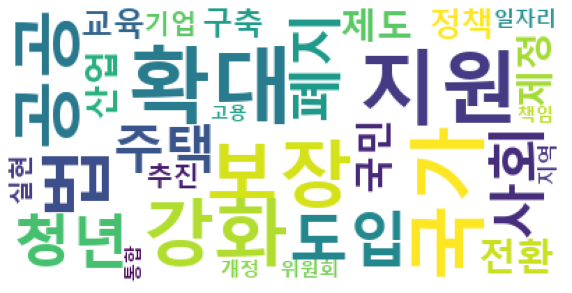

In [599]:
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()